In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


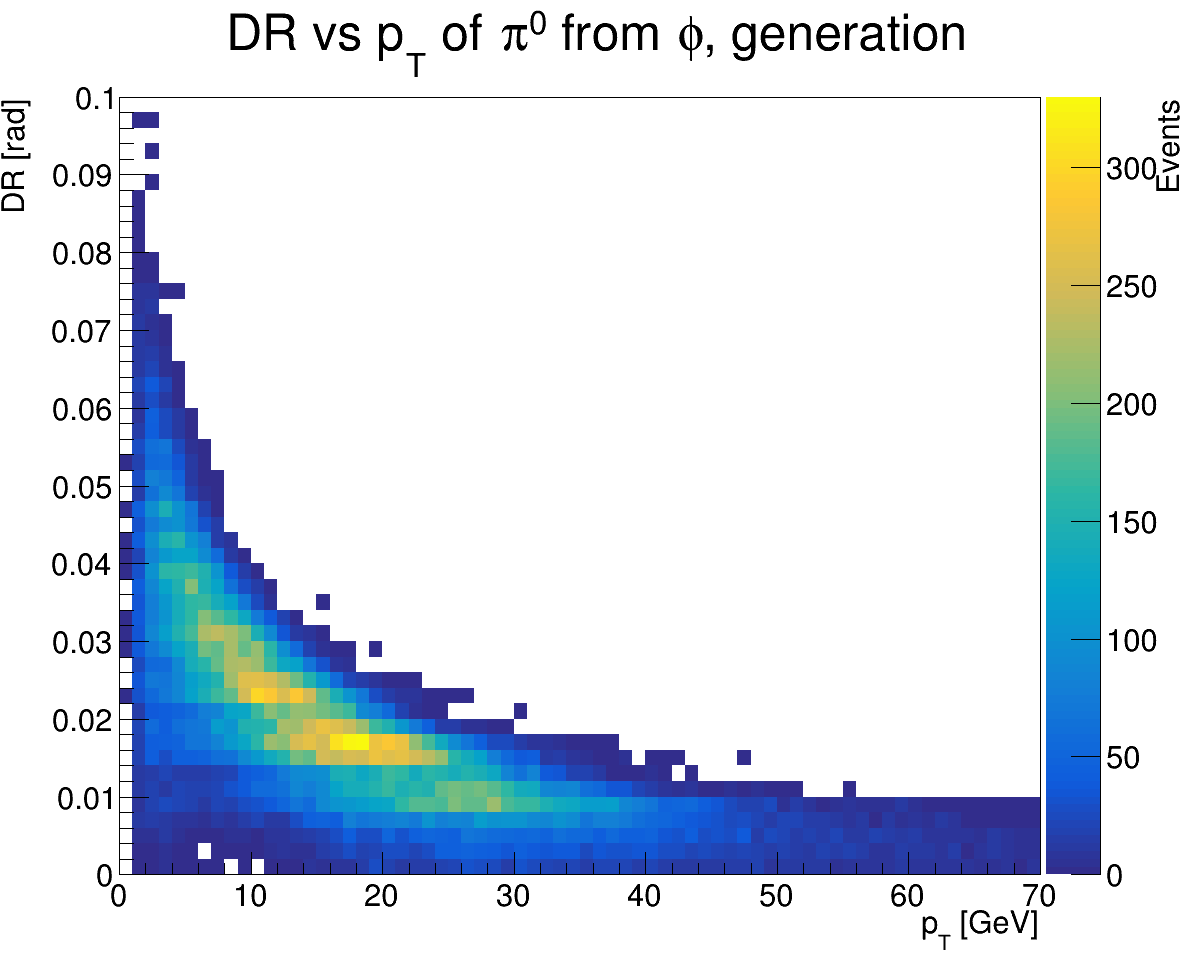

In [7]:
date = "MAY11"

chain = ROOT.TChain("events")
chain.Add("/home/submit/pdmonte/Hrare2023/analysis/{0}/2018/outname_mc1040_GFcat_OmegaCat_2018.root".format(date))

df = ROOT.RDataFrame(chain)

canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1000)
#canvas = ROOT.TCanvas()

h = df.Define("Pi0PhiGenPT", "getPTParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_pt, 111, 333, 25)")\
    .Define("PionGenDR", "getDRParticleMotherOneGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 111, 333, 25, 333, 25)")\
    .Histo2D(("#pi^{0} p_{T}", "DR vs p_{T} of #pi^{0} from #phi, generation", 70, 0, 70, 50, 0, 0.1),"Pi0PhiGenPT", "PionGenDR")

h.GetXaxis().SetTitle("p_{T} [GeV]")
h.GetYaxis().SetTitle("DR [rad]")
h.GetZaxis().SetTitle("Events")

h.SetContour(100)
h.Draw("colz")
h.SetStats(0)
canvas.SetRightMargin(0.13)
canvas.Draw()
#canvas.SaveAs("~/public_html/plotsMAY24/PhiGEN_pi0_pt.png")


In [3]:
new = df.Define("Pi0PhiGenPT", "getPTParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_pt, 111, 333, 25)")\
    .Define("PionGenDR", "getDRParticleMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 111, 333, 333, 25)")

x = new.AsNumpy(columns=["Pi0PhiGenPT", "PionGenDR"])

pddf = pd.DataFrame(x)

pddf["size"] = pddf.apply(lambda row: len(row["Pi0PhiGenPT"])*len(row["PionGenDR"]), axis=1)

pddf["Pi0PhiGenPT"] = pddf["Pi0PhiGenPT"].apply(lambda vec: vec[0])
pddf["PionGenDR"] = pddf["PionGenDR"].apply(lambda vec: vec[0])
pddf = pddf[(pddf['size'] > 0)]
display(pddf)

,Pi0PhiGenPT,PionGenDR,size
0,4.250000,0.042072,1
1,9.500000,0.022861,1
2,5.406250,0.042072,1
3,19.625000,0.018426,1
4,12.062500,0.019531,1
...,...,...,...
51728,12.281250,0.018484,1
51729,7.703125,0.014084,1
51730,14.781250,0.014084,1
51731,37.625000,0.004026,1


In [4]:
pt = np.asarray(pddf[(pddf['PionGenDR'] > 0.2)]["Pi0PhiGenPT"])
dr = np.asarray(pddf[(pddf['PionGenDR'] > 0.2)]["PionGenDR"])

pt = np.asarray(pddf["Pi0PhiGenPT"])
dr = np.asarray(pddf["PionGenDR"])

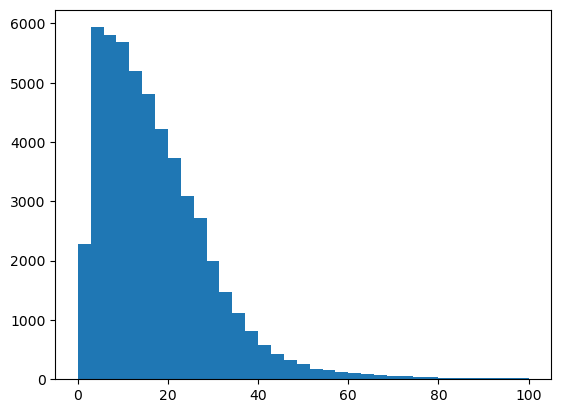

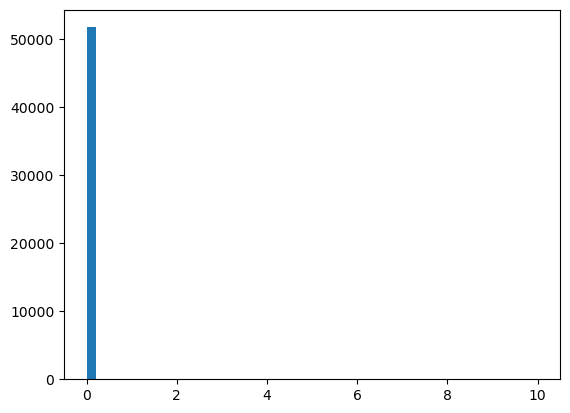

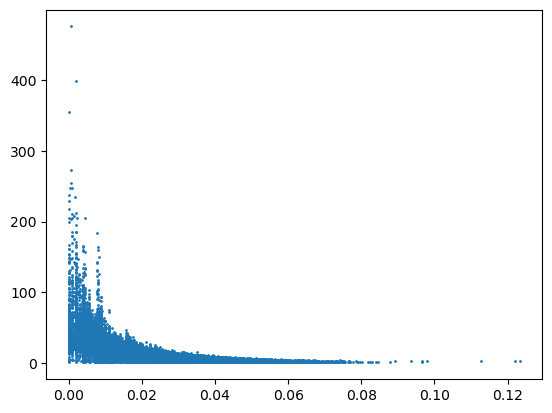

0.12334103882312775


In [6]:
counts, bins = np.histogram(pt, bins=35, range=(0,100))
plt.bar(bins[:-1], counts, width=np.diff(bins), align="edge")
plt.show()

counts, bins = np.histogram(dr, bins=50, range=(0,10))
plt.bar(bins[:-1], counts, width=np.diff(bins), align="edge")
plt.show()

plt.scatter(dr, pt, s=1)
plt.show()

print(np.max(dr))